# Import thư viện

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix
import joblib


In [35]:
train_data = pd.read_csv('data/Train_data.csv')
test_data = pd.read_csv('data/test_data.csv')

In [37]:
print(f"The shape of the train data: {train_data.shape}")
print(f"The shape of the test data: {test_data.shape}")

The shape of the train data: (2351, 25)
The shape of the test data: (486, 25)


In [39]:
train_data.head()


,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,...,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein,Disease
0,0.739597,0.650198,0.713631,0.868491,0.687433,0.529895,0.290006,0.631045,0.001328,0.795829,...,0.502665,0.215560,0.512941,0.064187,0.610827,0.939485,0.095512,0.465957,0.769230,Healthy
1,0.121786,0.023058,0.944893,0.905372,0.507711,0.403033,0.164216,0.307553,0.207938,0.505562,...,0.856810,0.652465,0.106961,0.942549,0.344261,0.666368,0.659060,0.816982,0.401166,Diabetes
2,0.452539,0.116135,0.544560,0.400640,0.294538,0.382021,0.625267,0.295122,0.868369,0.026808,...,0.466795,0.387332,0.421763,0.007186,0.506918,0.431704,0.417295,0.799074,0.779208,Thalasse
3,0.136609,0.015605,0.419957,0.191487,0.081168,0.166214,0.073293,0.668719,0.125447,0.501051,...,0.016256,0.040137,0.826721,0.265415,0.594148,0.225756,0.490349,0.637061,0.354094,Anemia
4,0.176737,0.752220,0.971779,0.785286,0.443880,0.439851,0.894991,0.442159,0.257288,0.805987,...,0.429431,0.146294,0.221574,0.015280,0.567115,0.841412,0.153350,0.794008,0.094970,Thalasse


In [41]:
test_data.head()

,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,...,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein,Disease
0,0.001827,0.033693,0.114755,0.997927,0.562604,0.866499,0.578042,0.914615,0.026864,0.038641,...,0.653230,0.186104,0.430398,0.016678,0.885352,0.652733,0.788235,0.054788,0.031313,Thalasse
1,0.436679,0.972653,0.084998,0.180909,0.675736,0.563889,0.798382,0.670361,0.376092,0.184890,...,0.833540,0.153001,0.458533,0.401845,0.635969,0.574425,0.047025,0.607985,0.594123,Diabetes
2,0.545697,0.324815,0.584467,0.475748,0.558596,0.661007,0.934056,0.381782,0.500342,0.531829,...,0.678901,0.220479,0.817151,0.690981,0.101633,0.855740,0.551124,0.413294,0.070909,Heart Di
3,0.172994,0.050351,0.736000,0.782022,0.069435,0.085219,0.032907,0.460619,0.785448,0.491495,...,0.381500,0.459396,0.420154,0.798537,0.399236,0.324600,0.499504,0.436662,0.242766,Diabetes
4,0.758534,0.739968,0.597868,0.772683,0.875720,0.860265,0.486189,0.486686,0.621048,0.191756,...,0.993381,0.272338,0.663579,0.265227,0.918847,0.804910,0.571119,0.188368,0.750848,Heart Di


In [43]:
train_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2351 entries, 0 to 2350
Data columns (total 25 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Glucose                                    2351 non-null   float64
 1   Cholesterol                                2351 non-null   float64
 2   Hemoglobin                                 2351 non-null   float64
 3   Platelets                                  2351 non-null   float64
 4   White Blood Cells                          2351 non-null   float64
 5   Red Blood Cells                            2351 non-null   float64
 6   Hematocrit                                 2351 non-null   float64
 7   Mean Corpuscular Volume                    2351 non-null   float64
 8   Mean Corpuscular Hemoglobin                2351 non-null   float64
 9   Mean Corpuscular Hemoglobin Concentration  2351 non-null   float64
 10  Insulin                 

In [45]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 486 entries, 0 to 485
Data columns (total 25 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Glucose                                    486 non-null    float64
 1   Cholesterol                                486 non-null    float64
 2   Hemoglobin                                 486 non-null    float64
 3   Platelets                                  486 non-null    float64
 4   White Blood Cells                          486 non-null    float64
 5   Red Blood Cells                            486 non-null    float64
 6   Hematocrit                                 486 non-null    float64
 7   Mean Corpuscular Volume                    486 non-null    float64
 8   Mean Corpuscular Hemoglobin                486 non-null    float64
 9   Mean Corpuscular Hemoglobin Concentration  486 non-null    float64
 10  Insulin                   

# Data processing

In [48]:
train_data.isnull().sum()

Glucose                                      0
Cholesterol                                  0
Hemoglobin                                   0
Platelets                                    0
White Blood Cells                            0
Red Blood Cells                              0
Hematocrit                                   0
Mean Corpuscular Volume                      0
Mean Corpuscular Hemoglobin                  0
Mean Corpuscular Hemoglobin Concentration    0
Insulin                                      0
BMI                                          0
Systolic Blood Pressure                      0
Diastolic Blood Pressure                     0
Triglycerides                                0
HbA1c                                        0
LDL Cholesterol                              0
HDL Cholesterol                              0
ALT                                          0
AST                                          0
Heart Rate                                   0
Creatinine   

In [50]:
test_data.isnull().sum()

Glucose                                      0
Cholesterol                                  0
Hemoglobin                                   0
Platelets                                    0
White Blood Cells                            0
Red Blood Cells                              0
Hematocrit                                   0
Mean Corpuscular Volume                      0
Mean Corpuscular Hemoglobin                  0
Mean Corpuscular Hemoglobin Concentration    0
Insulin                                      0
BMI                                          0
Systolic Blood Pressure                      0
Diastolic Blood Pressure                     0
Triglycerides                                0
HbA1c                                        0
LDL Cholesterol                              0
HDL Cholesterol                              0
ALT                                          0
AST                                          0
Heart Rate                                   0
Creatinine   

In [52]:
train_data.duplicated().sum()

2286

In [54]:
train_data = train_data.drop_duplicates()
train_data.duplicated().sum()

0

In [56]:
test_data.duplicated().sum()

0

In [58]:
train_data["Disease"].value_counts()

Disease
Healthy     16
Diabetes    16
Anemia      16
Thalasse    14
Thromboc     3
Name: count, dtype: int64

In [60]:
test_data["Disease"].value_counts()

Disease
Diabetes    294
Anemia       84
Thalasse     48
Heart Di     39
Thromboc     16
Healthy       5
Name: count, dtype: int64

<Axes: xlabel='Disease'>

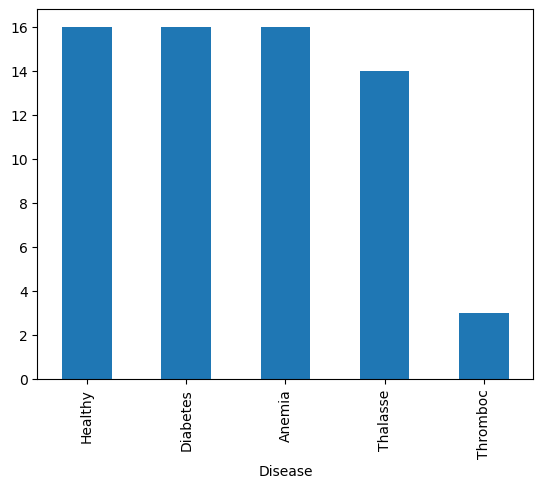

In [62]:
train_data["Disease"].value_counts().plot(kind="bar")

In [64]:
# Mã hóa cột 'Disease' thành các giá trị số
label_encoder = LabelEncoder()
train_data['Disease'] = label_encoder.fit_transform(train_data['Disease'])

In [66]:
# Chia dữ liệu và biến mục tiêu
X = train_data.drop('Disease', axis=1)
y = train_data['Disease']

In [68]:
# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# visualization

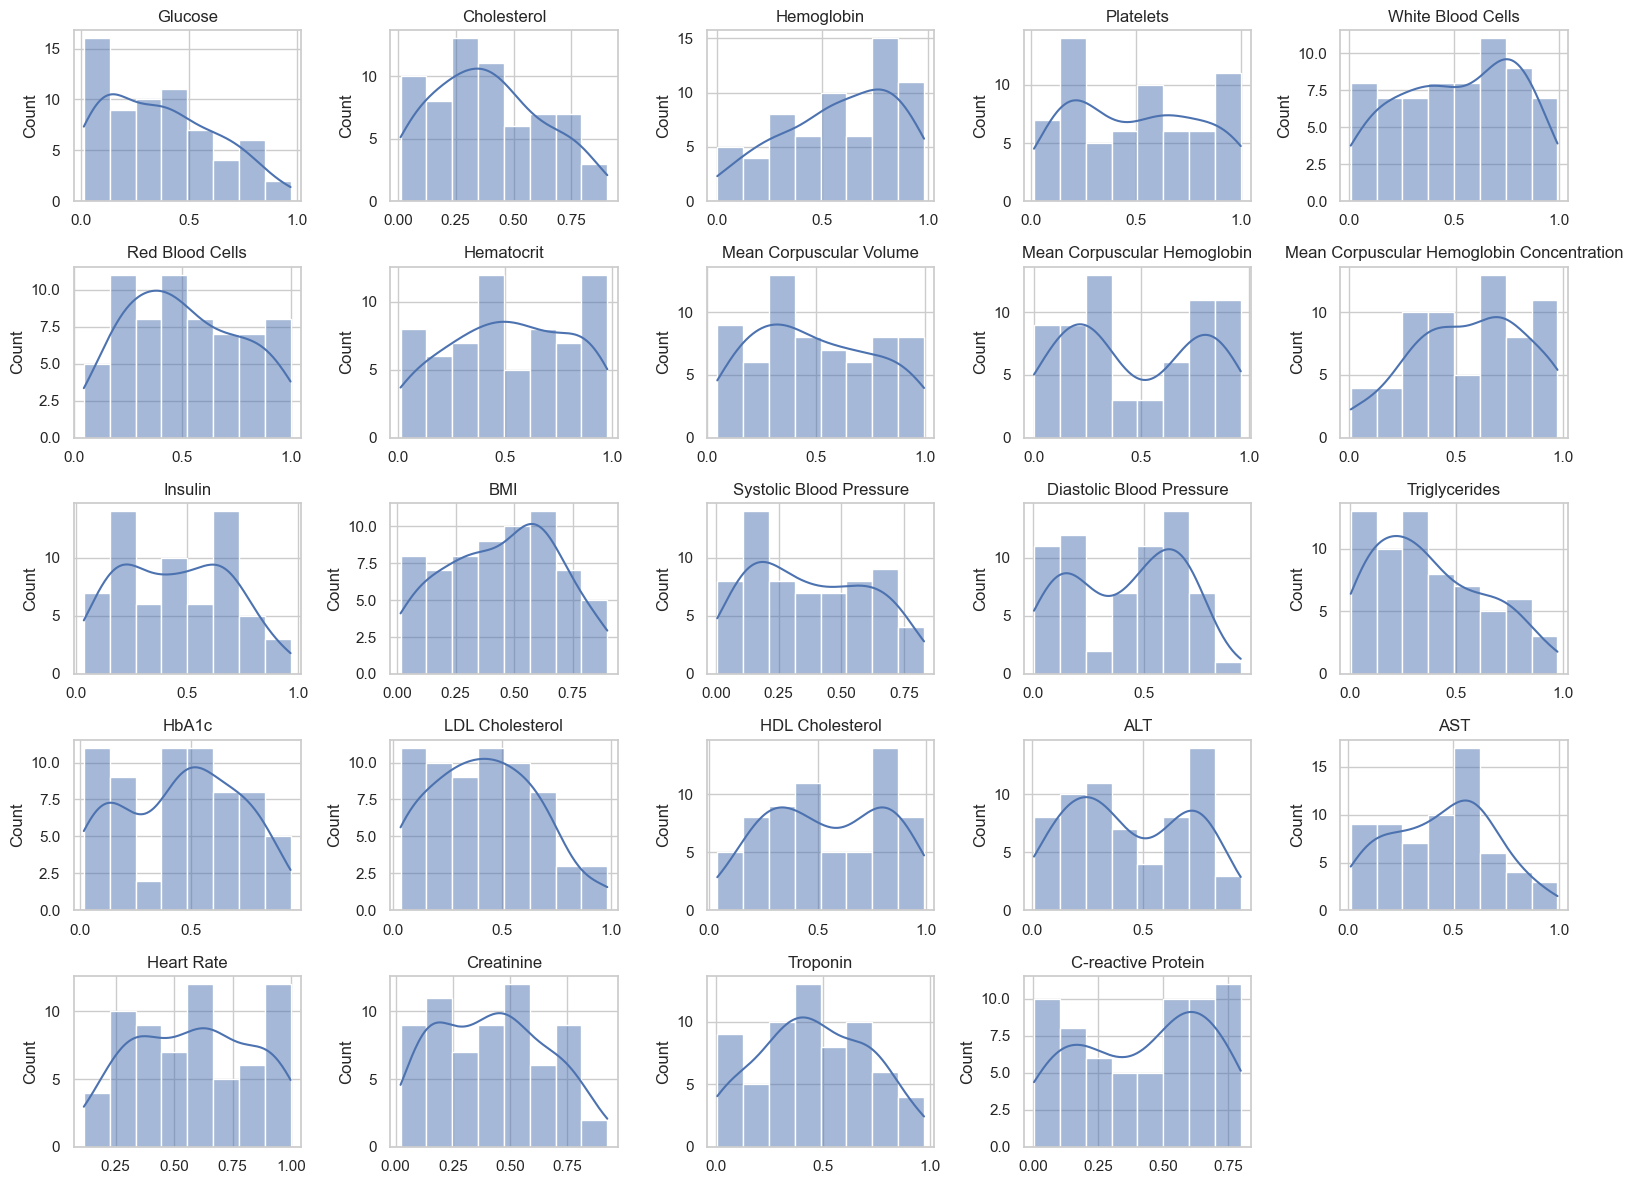

In [168]:
# Thiết lập kiểu đồ họa
sns.set(style="whitegrid")

# Trực quan hóa phân phối của từng biến số
plt.figure(figsize=(16, 12))
for i, column in enumerate(train_data.columns[:-1], 1):  # Loại bỏ cột 'Disease'
    plt.subplot(5, 5, i)
    sns.histplot(train_data[column], kde=True)
    plt.title(column)
    plt.xlabel('')
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

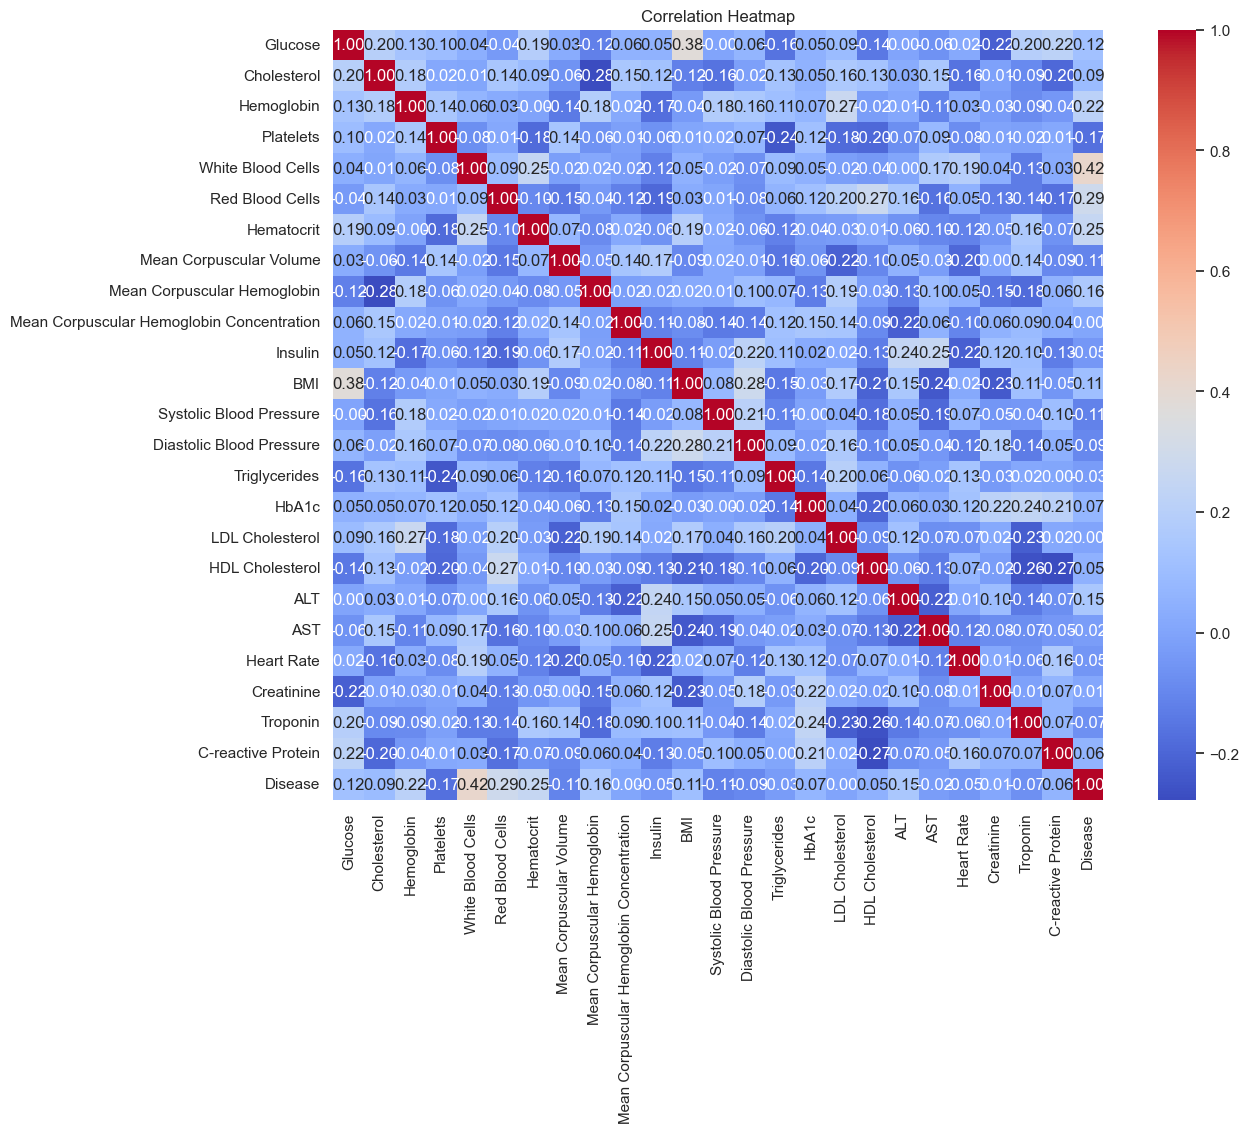

In [170]:
# Tính toán ma trận tương quan
correlation_matrix = train_data.corr()

# Trực quan hóa ma trận tương quan
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()

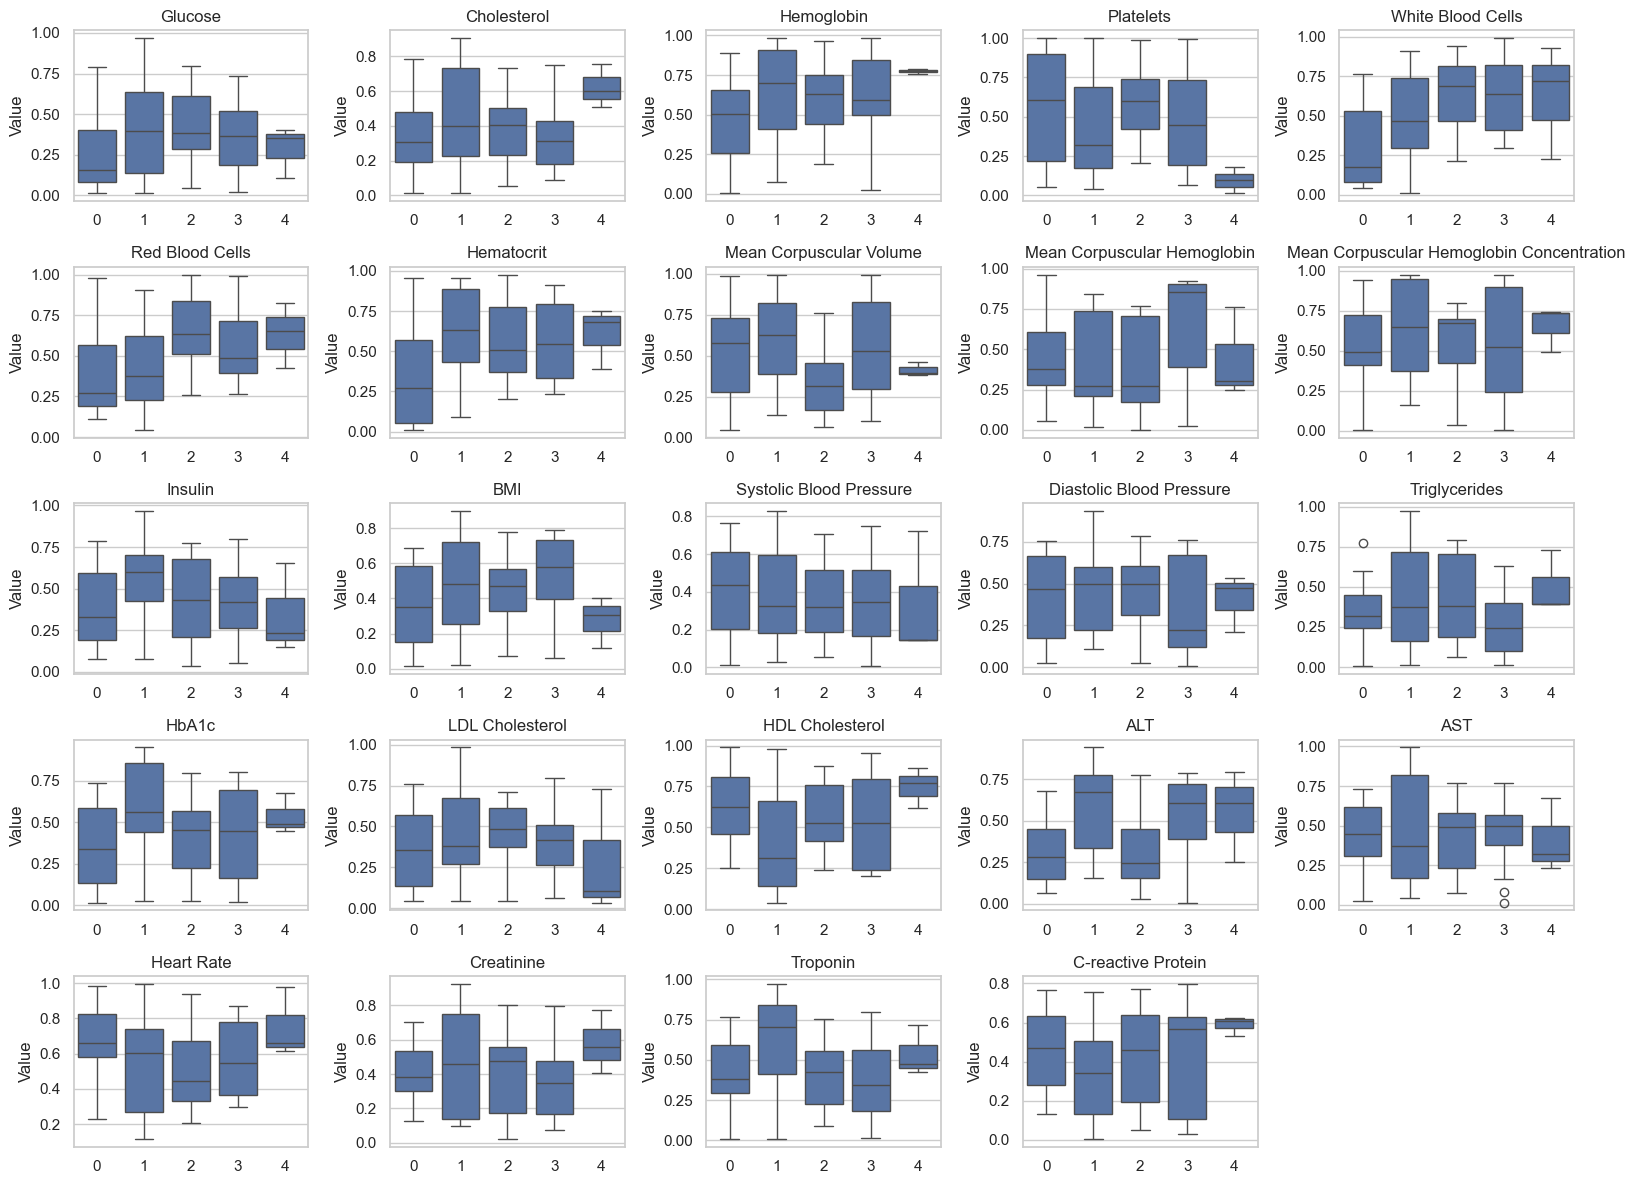

In [172]:
plt.figure(figsize=(16, 12))
for i, column in enumerate(train_data.columns[:-1], 1):  # Loại bỏ cột 'Disease'
    plt.subplot(5, 5, i)
    sns.boxplot(x='Disease', y=column, data=train_data)
    plt.title(column)
    plt.xlabel('')
    plt.ylabel('Value')

plt.tight_layout()
plt.show()

# Oversampling

In [78]:
# Kiểm tra số lượng mẫu của mỗi lớp
class_counts = y.value_counts()
print("Class counts before SMOTE:\n", class_counts)

# Loại bỏ các lớp có ít hơn 6 mẫu
rare_classes = class_counts[class_counts < 6].index
X_filtered = X[~y.isin(rare_classes)]
y_filtered = y[~y.isin(rare_classes)]

# Áp dụng SMOTE
X_scaled_filtered = scaler.fit_transform(X_filtered)
X_resampled, y_resampled = smote.fit_resample(X_scaled_filtered, y_filtered)


Class counts before SMOTE:
 Disease
2    16
1    16
0    16
3    14
4     3
Name: count, dtype: int64


In [86]:
print("shape of resampled x:", X_resampled.shape)
print("shape of resampled y:", y_resampled.shape)

shape of resampled x: (64, 24)
shape of resampled y: (64,)


In [110]:
# Tách các đặc trưng (X_test) và nhãn (y_test)
X_test = test_data.drop(columns=['Disease'])  # Loại bỏ cột nhãn
y_test = test_data['Disease']

# Chuẩn hóa dữ liệu
scaler_test = StandardScaler()
X_scaled_test = scaler_test.fit_transform(X_test)

# Kiểm tra số lượng mẫu của mỗi lớp
class_counts = y.value_counts()
print("Class counts before SMOTE:\n", class_counts)

# Áp dụng SMOTE
X_scaled_filtered_test = scaler_test.fit_transform(X_filtered)
X_resampled_test, y_resampled_test = smote.fit_resample(X_scaled_filtered_test, y_filtered)


Class counts before SMOTE:
 Disease
2    16
1    16
0    16
3    14
4     3
Name: count, dtype: int64


# Spliting the data

In [88]:
X_train, X_val, y_train, y_val = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Random Forest

In [90]:
rf_model = RandomForestClassifier(random_state=42)

param_dist_rf = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [10, 20, 30, None],
    'criterion': ['gini', 'entropy']
}

In [92]:
random_search_rf = RandomizedSearchCV(rf_model, param_distributions=param_dist_rf, n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)
random_search_rf.fit(X_train, y_train)


F:\code\Lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 72 is smaller than n_iter=100. Running 72 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 3 folds for each of 72 candidates, totalling 216 fits


F:\code\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
72 fits failed out of a total of 216.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
55 fits failed with the following error:
Traceback (most recent call last):
  File "F:\code\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "F:\code\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "F:\code\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "F:\code\Lib\site-packages\sklearn\utils\_param_validation.py", line 95, in validate_parameter_constraints
    

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [10, 20, 30, None],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'n_estimators': [100, 200, 300]},
                   random_state=42, verbose=2)

In [93]:
y_val_pred_rf = random_search_rf.predict(X_val)
accuracy_rf = accuracy_score(y_val, y_val_pred_rf)
precision_rf = precision_score(y_val, y_val_pred_rf, average='weighted')
recall_rf = recall_score(y_val, y_val_pred_rf, average='weighted')
f1_rf = f1_score(y_val, y_val_pred_rf, average='weighted')


In [94]:
print("Random Forest Classifier:")
print("Accuracy:", accuracy_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1 Score:", f1_rf)

Random Forest Classifier:
Accuracy: 0.7692307692307693
Precision: 0.8717948717948718
Recall: 0.7692307692307693
F1 Score: 0.7957264957264958


In [112]:
y_test_pred_rf = random_search_rf.predict(X_resampled_test)
accuracy_test_rf = accuracy_score(y_resampled_test, y_test_pred_rf)
precision_test_rf = precision_score(y_resampled_test, y_test_pred_rf, average='weighted', zero_division=0)
recall_test_rf = recall_score(y_resampled_test, y_test_pred_rf, average='weighted', zero_division=0)
f1_test_rf = f1_score(y_resampled_test, y_test_pred_rf, average='weighted', zero_division=0)

In [114]:
print("Random Forest Classifier (Test Set):")
print("Accuracy:", accuracy_test_rf)
print("Precision:", precision_test_rf)
print("Recall:", recall_test_rf)
print("F1 Score:", f1_test_rf)

Random Forest Classifier (Test Set):
Accuracy: 0.9375
Precision: 0.9393382352941176
Recall: 0.9375
F1 Score: 0.937958211143695


# Gradient Boosting

In [116]:
gb_model = GradientBoostingClassifier(random_state=42)

param_dist_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}


In [118]:
random_search_gb = RandomizedSearchCV(gb_model, param_distributions=param_dist_gb, n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)
random_search_gb.fit(X_train, y_train)


F:\code\Lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 27 is smaller than n_iter=100. Running 27 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 3 folds for each of 27 candidates, totalling 81 fits


RandomizedSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.1, 0.2],
                                        'max_depth': [3, 5, 7],
                                        'n_estimators': [100, 200, 300]},
                   random_state=42, verbose=2)

In [119]:
y_val_pred_gb = random_search_gb.predict(X_val)
accuracy_gb = accuracy_score(y_val, y_val_pred_gb)
precision_gb = precision_score(y_val, y_val_pred_gb, average='weighted')
recall_gb = recall_score(y_val, y_val_pred_gb, average='weighted')
f1_gb = f1_score(y_val, y_val_pred_gb, average='weighted')


In [120]:
print("Gradient Boosting Classifier:")
print("Accuracy:", accuracy_gb)
print("Precision:", precision_gb)
print("Recall:", recall_gb)
print("F1 Score:", f1_gb)

Gradient Boosting Classifier:
Accuracy: 0.6923076923076923
Precision: 0.8807692307692307
Recall: 0.6923076923076923
F1 Score: 0.7081196581196582


In [124]:
y_test_pred_gb = random_search_gb.predict(X_resampled_test)
accuracy_test_gb = accuracy_score(y_resampled_test, y_test_pred_gb)
precision_test_gb = precision_score(y_resampled_test, y_test_pred_gb, average='weighted')
recall_test_gb = recall_score(y_resampled_test, y_test_pred_gb, average='weighted')
f1_test_gb = f1_score(y_resampled_test, y_test_pred_gb, average='weighted')


In [126]:
print("\nGradient Boosting Classifier (Test Set):")
print("Accuracy:", accuracy_test_gb)
print("Precision:", precision_test_gb)
print("Recall:", recall_test_gb)
print("F1 Score:", f1_test_gb)


Gradient Boosting Classifier (Test Set):
Accuracy: 0.9375
Precision: 0.9458204334365325
Recall: 0.9375
F1 Score: 0.9376623376623376


#  Support Vector Machine (SVM)

In [128]:
svm_model = SVC(random_state=42)

param_dist_svm = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'linear']
}

In [130]:
random_search_svm = RandomizedSearchCV(svm_model, param_distributions=param_dist_svm, n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)
random_search_svm.fit(X_train, y_train)


Fitting 3 folds for each of 32 candidates, totalling 96 fits


F:\code\Lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 32 is smaller than n_iter=100. Running 32 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=3, estimator=SVC(random_state=42), n_iter=100, n_jobs=-1,
                   param_distributions={'C': [0.1, 1, 10, 100],
                                        'gamma': [1, 0.1, 0.01, 0.001],
                                        'kernel': ['rbf', 'linear']},
                   random_state=42, verbose=2)

In [132]:
y_val_pred_svm = random_search_svm.predict(X_val)
accuracy_svm = accuracy_score(y_val, y_val_pred_svm)
precision_svm = precision_score(y_val, y_val_pred_svm, average='weighted')
recall_svm = recall_score(y_val, y_val_pred_svm, average='weighted')
f1_svm = f1_score(y_val, y_val_pred_svm, average='weighted')


In [134]:
print("Support Vector Machine Classifier:")
print("Accuracy:", accuracy_svm)
print("Precision:", precision_svm)
print("Recall:", recall_svm)
print("F1 Score:", f1_svm)

Support Vector Machine Classifier:
Accuracy: 0.46153846153846156
Precision: 0.7051282051282051
Recall: 0.46153846153846156
F1 Score: 0.4981684981684981


In [138]:
y_test_pred_svm = random_search_svm.predict(X_resampled_test)
accuracy_test_svm = accuracy_score(y_resampled_test, y_test_pred_svm)
precision_test_svm = precision_score(y_resampled_test, y_test_pred_svm, average='weighted')
recall_test_svm = recall_score(y_resampled_test, y_test_pred_svm, average='weighted')
f1_test_svm = f1_score(y_resampled_test, y_test_pred_svm, average='weighted')


In [140]:
print("\nSupport Vector Machine Classifier (Test Set):")
print("Accuracy:", accuracy_test_svm)
print("Precision:", precision_test_svm)
print("Recall:", recall_test_svm)
print("F1 Score:", f1_test_svm)


Support Vector Machine Classifier (Test Set):
Accuracy: 0.890625
Precision: 0.9069940476190477
Recall: 0.890625
F1 Score: 0.8913958139173657


# Logistic Regression

In [142]:
lr_model = LogisticRegression(max_iter=1000, random_state=42)

param_dist_lr = {
    'C': [0.1, 1, 10, 100],
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

In [144]:
random_search_lr = RandomizedSearchCV(lr_model, param_distributions=param_dist_lr, n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)
random_search_lr.fit(X_train, y_train)


F:\code\Lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 80 is smaller than n_iter=100. Running 80 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 3 folds for each of 80 candidates, totalling 240 fits


F:\code\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
156 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
12 fits failed with the following error:
Traceback (most recent call last):
  File "F:\code\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "F:\code\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "F:\code\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1172, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
             ^^

RandomizedSearchCV(cv=3,
                   estimator=LogisticRegression(max_iter=1000, random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'C': [0.1, 1, 10, 100],
                                        'penalty': ['l1', 'l2', 'elasticnet',
                                                    'none'],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag',
                                                   'saga']},
                   random_state=42, verbose=2)

In [146]:
y_val_pred_lr = random_search_lr.predict(X_val)
accuracy_lr = accuracy_score(y_val, y_val_pred_lr)
precision_lr = precision_score(y_val, y_val_pred_lr, average='weighted')
recall_lr = recall_score(y_val, y_val_pred_lr, average='weighted')
f1_lr = f1_score(y_val, y_val_pred_lr, average='weighted')


In [148]:
print("Logistic Regression Classifier:")
print("Accuracy:", accuracy_lr)
print("Precision:", precision_lr)
print("Recall:", recall_lr)
print("F1 Score:", f1_lr)

Logistic Regression Classifier:
Accuracy: 0.46153846153846156
Precision: 0.5269230769230769
Recall: 0.46153846153846156
F1 Score: 0.48547008547008547


In [150]:
y_test_pred_lr = random_search_lr.predict(X_resampled_test)
accuracy_test_lr = accuracy_score(y_resampled_test, y_test_pred_lr)
precision_test_lr = precision_score(y_resampled_test, y_test_pred_lr, average='weighted')
recall_test_lr = recall_score(y_resampled_test, y_test_pred_lr, average='weighted')
f1_test_lr = f1_score(y_resampled_test, y_test_pred_lr, average='weighted')


In [152]:
print("\nLogistic Regression Classifier (Test Set):")
print("Accuracy:", accuracy_test_lr)
print("Precision:", precision_test_lr)
print("Recall:", recall_test_lr)
print("F1 Score:", f1_test_lr)


Logistic Regression Classifier (Test Set):
Accuracy: 0.890625
Precision: 0.8931372549019608
Recall: 0.890625
F1 Score: 0.8910068426197458


#results

In [155]:
results = {
    "Random Forest": {
        "Accuracy": accuracy_test_rf,
        "Precision": precision_test_rf,
        "Recall": recall_test_rf,
        "F1 Score": f1_test_rf
    },
    "Gradient Boosting": {
        "Accuracy": accuracy_test_gb,
        "Precision": precision_test_gb,
        "Recall": recall_test_gb,
        "F1 Score": f1_test_gb
    },
    "Support Vector Machine": {
        "Accuracy": accuracy_test_svm,
        "Precision": precision_test_svm,
        "Recall": recall_test_svm,
        "F1 Score": f1_test_svm
    },
    "Logistic Regression": {
        "Accuracy": accuracy_test_lr,
        "Precision": precision_test_lr,
        "Recall": recall_test_lr,
        "F1 Score": f1_test_lr
    }
}

results_df = pd.DataFrame(results).T
print(results_df)


                        Accuracy  Precision    Recall  F1 Score
Random Forest           0.937500   0.939338  0.937500  0.937958
Gradient Boosting       0.937500   0.945820  0.937500  0.937662
Support Vector Machine  0.890625   0.906994  0.890625  0.891396
Logistic Regression     0.890625   0.893137  0.890625  0.891007


In [159]:
# Lưu mô hình
joblib.dump(random_search_rf, 'rf_model.pkl')